In this I am going to apply Statistical analysis for ML - distributions, correlations, hypothesis testing
Exploratory Data Analysis (EDA) techniques and visualization
Creating interactive visualizations using Plotly

In [1]:
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("C:/Users/GLOBAL/Documents/Titanic.csv")

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Basic Data Exploration 

In [2]:
# Shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns)

# Data types and null values
print(df.info())
print(df.isnull().sum())

# Summary statistics
df.describe()

Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Nam

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Interpretation:
.head() shows the first 5 rows – helps to see what the data looks like.

.info() shows column types and missing values – e.g., "Age" and "Cabin" have missing values.

.describe() gives summary stats – for example, the average age is ~29.

isnull().sum() tells how many values are missing – important for data cleaning.

Why it matters:
This helps us understand the structure of the dataset, what cleaning is needed, and what type of values we’re working with (e.g., numbers or categories).

Distribution Analysis

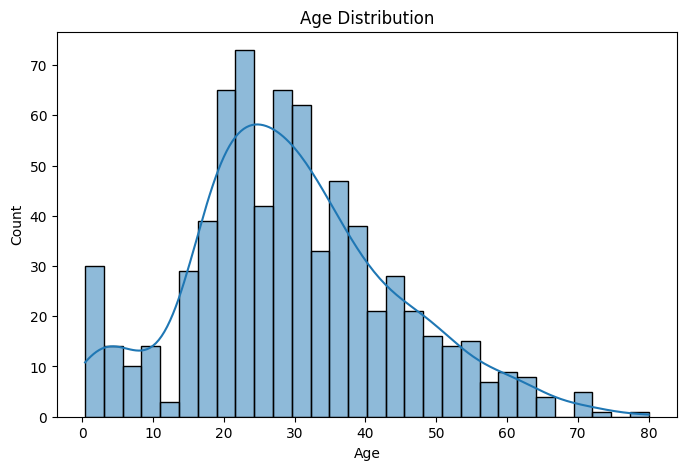

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Interpretation:
Most passengers are between 20 to 40 years old.

There's a peak near 28–30, which is close to the average age.

Some people are very young (babies) or old (70+), but fewer in number.

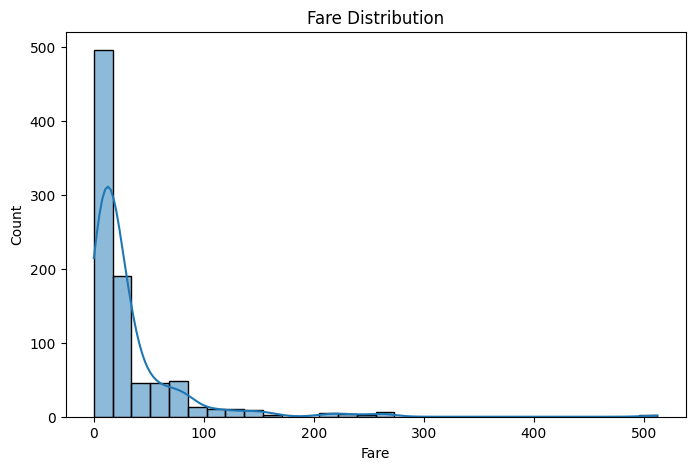

In [4]:
# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

# Interpretation:
Most people paid low fares (under 50), but some paid very high (over 500).

The distribution is skewed to the right – a few passengers paid a lot (maybe first class).

Why it matters:
Knowing the spread of age and fare helps us understand the passengers’ profile and if these affect survival.

# Correlation Analysis

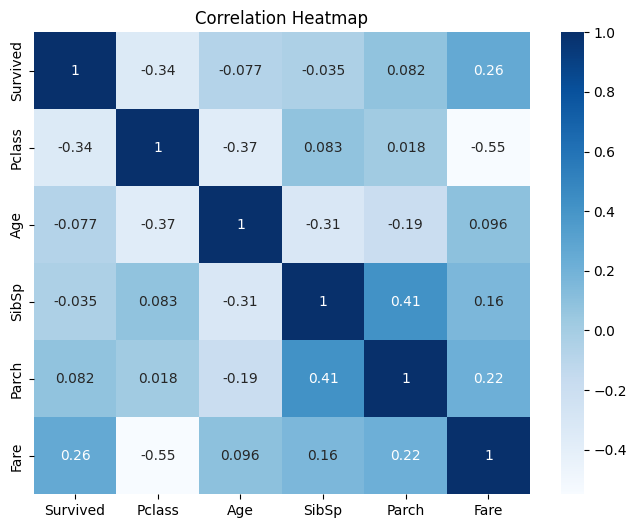

In [5]:
# Select numeric columns
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Correlation matrix
corr = df[numeric_cols].corr()

# Heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# Interpretation:
Survived vs Fare: Moderate positive correlation → people who paid more had better survival.

Survived vs Pclass: Negative correlation → higher class (1st) = better survival.

Other features like SibSp and Parch have weak correlations.

Why it matters:
This helps us choose important features for modeling. Features with strong correlation are likely useful for prediction.

# Interactive Visualizations using Plotly

In [8]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/ed/20/f2b7ac96a91cc5f70d81320adad24cc41bf52013508d649b1481db225780/plotly-6.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.15.1 from https://files.pythonhosted.org/packages/7f/26/43caf834e47c63883a5eddc02893b7fdbe6a0a4508ff6dc401907f3cc085/narwhals-2.0.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.6 MB 3.0 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.6 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.6 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.6 MB 958.1 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.6 MB 958.4 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.6 MB 860.2 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.6 MB 860.2 kB


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 222.6 kB/s eta 0:00:26
   ---------------- ----------------------- 3.9/9.6 MB 210.7 kB/s eta 0:00:28
   ---------------- ----------------------- 3.9/9.6 MB 210.7 kB/s eta 0:00:28
   ---------------- ----------------------- 3.9/9.6 MB 210.7 kB/s eta 0:00:28
   ---------------- ----------------------- 3.9/9.6 MB 210.7 kB/s eta 0:00:28
   ---------------- ----------------------- 3.9/9.6 MB 209.3 kB

In [4]:
import plotly.express as px
print("Plotly is working!")

Plotly is working!


In [11]:
!pip install nbformat

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema>=2.15 from https://files.pythonhosted.org/packages/90/2b/0817a2b257fe88725c25589d89aec060581aabf668707a8d03b2e9e0cb2a/fastjsonschema-2.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/fe/54/c86cd8e011fe98803d7e382fd67c0df5ceab8d2b7ad8c5a81524f791551c/jsonschema-4.25.0-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/77/06/bb80f5f86020c4551da315d78b3ab75e8228f89f0162f2c3a819e407941a/attrs-25.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/01/0e/b27cdbaccf30b890c40ed1da9fd4a3593a5c


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'  # Opens charts in your browser

# Now your plot will work
fig = px.histogram(df, x='Survived', color='Survived', title='Survival Count')
fig.show()

Interpretation:
More people did not survive (0) than those who did (1).

Helps you see the imbalance in survival.

In [3]:
fig = px.pie(df, names='Sex', title='Gender Distribution')
fig.show()

Interpretation:
More men than women on the ship.

Gender is an important factor in survival (seen in later graphs).

In [4]:
fig = px.box(df, x='Survived', y='Age', title='Age Distribution by Survival')
fig.show()

Interpretation:
Survivors (1) tend to be slightly younger.

Some outliers (very old or very young) existed in both groups.

In [5]:
fig = px.histogram(df, x='Fare', color='Pclass', nbins=50, title='Fare Distribution by Class')
fig.show()

In [6]:
# Group and calculate survival rate
survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

fig = px.bar(survival_rate, x='Pclass', y='Survived', color='Sex', barmode='group',
             title='Survival Rate by Gender and Class')
fig.show()

Interpretation:
Women in 1st class had the highest survival rate.

Men in 3rd class had the lowest.

Survival was not equal — class and gender made a big difference

In [18]:
fig = px.pie(df, names='Embarked', title='Passengers by Port of Embarkation')
fig.show()

Interpretation:
Passengers who boarded from Cherbourg (C) had the highest survival rate.

Could be related to their class or location on the ship.

Why it matters:
Grouped analysis tells us how combinations of factors (like gender & class) affect survival.

In [7]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 title='Fare vs Age Colored by Survival',
                 hover_data=['Sex', 'Pclass'])
fig.show()

Interpretation:
This means survival depends on gender.

We reject the null hypothesis (that gender and survival are unrelated).

So, gender had a statistically significant impact on survival chances.

Why it matters:
Hypothesis testing confirms that patterns we see (like women surviving more) are not just by chance.

# Hypothesis Testing

In [20]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency = pd.crosstab(df['Sex'], df['Survived'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results")
print("Chi2 value:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Conclusion: Gender and survival are related (Reject H₀)")
else:
    print("Conclusion: No significant relationship (Fail to reject H₀)")

Chi-Square Test Results
Chi2 value: 260.71702016732104
p-value: 1.1973570627755645e-58
Conclusion: Gender and survival are related (Reject H₀)
